In [1]:
# importação das bibliotecas 
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score

import statistics

from scipy.stats import randint

import matplotlib.pyplot as plt

import numpy as np

import warnings
warnings.filterwarnings("ignore") 

In [2]:
australiano_df = pd.read_csv("australian.dat", sep=' ', header=None)
australiano_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
australiano_df.rename(columns={0:"col1", 1:"col2", 2:"col3",
                                  3:"col4", 4:"col5", 5:"col6", 
                                  6:"col7", 7:"col8", 8:"col9", 
                                  9:"col10", 10:"col11", 11:"col12", 
                                  12:"col13", 13:"col14", 14:"col15"}, inplace=True)
australiano_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# Exploração dos dados

In [4]:
australiano_df.describe()\
                        .transpose() 

,count,mean,std,min,25%,50%,75%,max
col1,690.0,0.678261,0.467482,0.00,0.000,1.000,1.0000,1.00
col2,690.0,31.568203,11.853273,13.75,22.670,28.625,37.7075,80.25
col3,690.0,4.758725,4.978163,0.00,1.000,2.750,7.2075,28.00
col4,690.0,1.766667,0.430063,1.00,2.000,2.000,2.0000,3.00
col5,690.0,7.372464,3.683265,1.00,4.000,8.000,10.0000,14.00
col6,690.0,4.692754,1.992316,1.00,4.000,4.000,5.0000,9.00
col7,690.0,2.223406,3.346513,0.00,0.165,1.000,2.6250,28.50
col8,690.0,0.523188,0.499824,0.00,0.000,1.000,1.0000,1.00
col9,690.0,0.427536,0.495080,0.00,0.000,0.000,1.0000,1.00
col10,690.0,2.400000,4.862940,0.00,0.000,0.000,3.0000,67.00


In [5]:
# Checando a proporção de registros por classe
aprovado = australiano_df.loc[australiano_df['col15'] == 1]
nao_aprovado = australiano_df.loc[australiano_df['col15'] == 0]
print("Temos", len(aprovado), "solicitações de cartão de crédito aprovadas e", len(nao_aprovado), 
      "solicitações de cartão de crédito não aprovadas.")

Temos 307 solicitações de cartão de crédito aprovadas e 383 solicitações de cartão de crédito não aprovadas.


In [6]:
australiano_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    690 non-null    int64  
 1   col2    690 non-null    float64
 2   col3    690 non-null    float64
 3   col4    690 non-null    int64  
 4   col5    690 non-null    int64  
 5   col6    690 non-null    int64  
 6   col7    690 non-null    float64
 7   col8    690 non-null    int64  
 8   col9    690 non-null    int64  
 9   col10   690 non-null    int64  
 10  col11   690 non-null    int64  
 11  col12   690 non-null    int64  
 12  col13   690 non-null    int64  
 13  col14   690 non-null    int64  
 14  col15   690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


<AxesSubplot:>

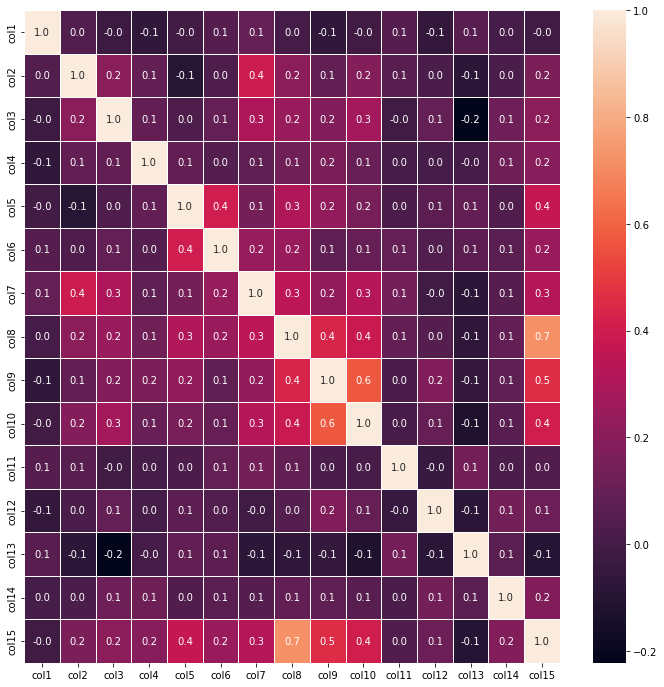

In [7]:
correlation = australiano_df.corr()
fig, ax = plt.subplots(figsize=(12,12)) 
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6, ax=ax)
plot

# Trata variáveis categóricas

In [8]:
categoricas = ["col1", "col4", "col5", "col6","col8", "col9", "col11", "col12"]

one_hot = OneHotEncoder(handle_unknown='ignore', categories='auto', drop='first',sparse=False)

cat_df = pd.DataFrame(one_hot.fit_transform(australiano_df[categoricas]), columns = one_hot.get_feature_names_out(categoricas))
cat_df.head()

,col1_1,col4_2,col4_3,col5_2,col5_3,col5_4,col5_5,col5_6,col5_7,col5_8,...,col6_4,col6_5,col6_7,col6_8,col6_9,col8_1,col9_1,col11_1,col12_2,col12_3
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [9]:
australiano_df_copia = australiano_df.drop(categoricas, axis=1)
australiano_df_copia = pd.concat([cat_df, australiano_df_copia], axis=1)
australiano_df_copia

,col1_1,col4_2,col4_3,col5_2,col5_3,col5_4,col5_5,col5_6,col5_7,col5_8,...,col11_1,col12_2,col12_3,col2,col3,col7,col10,col13,col14,col15
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,22.08,11.460,1.585,0,100,1213,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,22.67,7.000,0.165,0,160,1,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,29.58,1.750,1.250,0,280,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,21.67,11.500,0.000,11,0,1,1
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,20.17,8.170,1.960,14,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,31.57,10.500,6.500,0,0,1,1
686,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,20.67,0.415,0.125,0,0,45,0
687,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,18.83,9.540,0.085,0,100,1,1
688,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,27.42,14.500,3.085,1,120,12,1


In [10]:
import numpy as np
print(np.__version__)

1.21.5


# Trata variáveis númericas

In [11]:
numericas = ["col2", "col3", "col7", "col10", "col13", "col14"]                              

mms = MinMaxScaler()

num_df = pd.DataFrame(mms.fit_transform(australiano_df[numericas]), columns = mms.get_feature_names_out(numericas))
num_df.head()

,col2,col3,col7,col10,col13,col14
0,0.125263,0.409286,0.055614,0.000000,0.05,0.01212
1,0.134135,0.250000,0.005789,0.000000,0.08,0.00000
2,0.238045,0.062500,0.043860,0.000000,0.14,0.00000
3,0.119098,0.410714,0.000000,0.164179,0.00,0.00000
4,0.096541,0.291786,0.068772,0.208955,0.03,0.00158


In [12]:
australiano_df_copia = australiano_df_copia.drop(numericas, axis=1)
australiano_df_copia = pd.concat([num_df, australiano_df_copia], axis=1)
australiano_df_copia


,col2,col3,col7,col10,col13,col14,col1_1,col4_2,col4_3,col5_2,...,col6_5,col6_7,col6_8,col6_9,col8_1,col9_1,col11_1,col12_2,col12_3,col15
0,0.125263,0.409286,0.055614,0.000000,0.05,0.01212,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,0.134135,0.250000,0.005789,0.000000,0.08,0.00000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.238045,0.062500,0.043860,0.000000,0.14,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,0.119098,0.410714,0.000000,0.164179,0.00,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1
4,0.096541,0.291786,0.068772,0.208955,0.03,0.00158,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.267970,0.375000,0.228070,0.000000,0.00,0.00000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
686,0.104060,0.014821,0.004386,0.000000,0.00,0.00044,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
687,0.076391,0.340714,0.002982,0.000000,0.05,0.00000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
688,0.205564,0.517857,0.108246,0.014925,0.06,0.00011,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1


In [13]:
X = australiano_df_copia.loc[:,australiano_df_copia.columns != 'col15']
y = australiano_df_copia['col15']

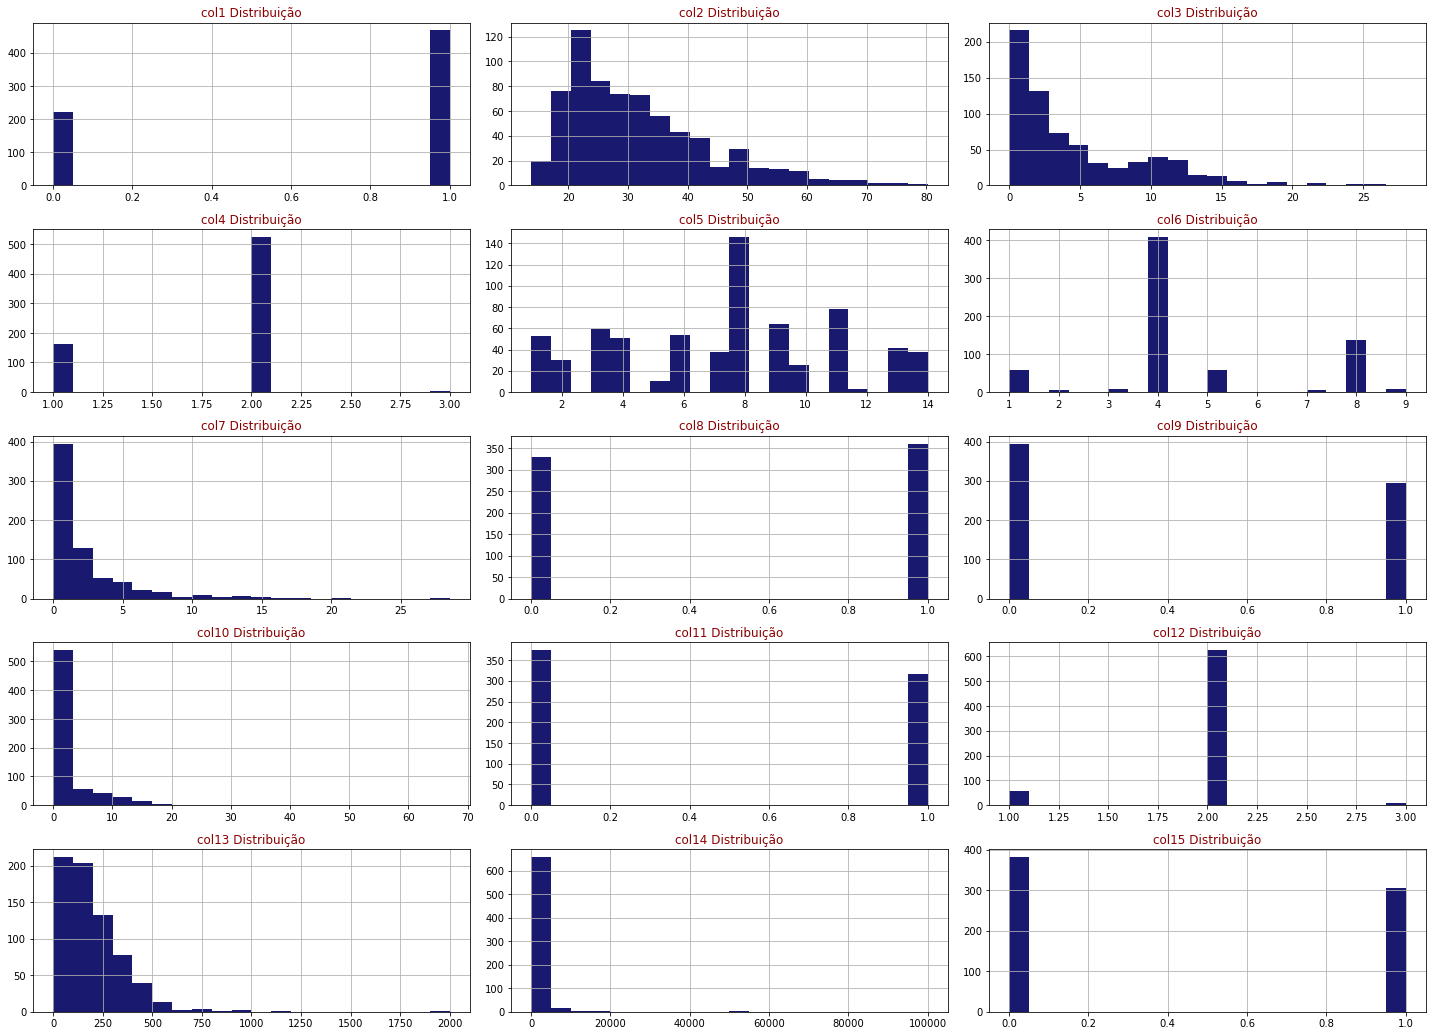

In [14]:
# Visualizar a distribuição de cada variável

rows = 7
cols = 3

fig = plt.figure(figsize = (20,20))

for i, coluna in enumerate(australiano_df.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    australiano_df[coluna].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
    ax.set_title(coluna + " Distribuição", color = 'DarkRed')

fig.tight_layout()  
plt.show()

In [15]:
australiano_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# Seleção de hiperparametros

Random Forest - Nested Cross validation

In [16]:
espaco_de_parametros = {
    "n_estimators" : range(70, 130, 10),
    "max_depth" : randint(0, 15),
    "min_samples_split" : randint(1, 10),
    "min_samples_leaf" : randint(0, 10),
    "bootstrap" : [True, False],
    "criterion" : ["gini", "entropy"]
}

# cross validation interno (variando conjunto de validação) 
modelo_tree = RandomizedSearchCV(RandomForestClassifier(), espaco_de_parametros, n_iter=10, return_train_score=True,
                           cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state=0)) 

In [17]:
# cross validation externo (variando conjunto de teste)
scores = cross_val_score(modelo_tree, X, y, cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=0))
scores

array([0.86956522, 0.86231884, 0.85507246, 0.86956522, 0.88405797])

In [18]:
print(" Acurácia Média: {:.2%}".format(round(scores.mean(), 3)),"Desvio padrão: {:.2%}".format(round(statistics.stdev(scores), 3)))

 Acurácia Média: 86.80% Desvio padrão: 1.10%


SVM - Nested Cross Validation 

In [19]:
espaco_de_parametros = {
    'C': [0.1, 0.5, 1, 2, 5],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

# cross validation interno (variando conjunto de validação) 
modelo_svm = RandomizedSearchCV(svm.SVC(probability=True), espaco_de_parametros, n_iter=10, return_train_score=True,
                           cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state=0)) 

In [20]:
# cross validation externo (variando conjunto de teste)
scores = cross_val_score(modelo_svm, X, y, cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=0))
scores

array([0.82608696, 0.86956522, 0.84782609, 0.84057971, 0.84057971])

In [21]:
print(" Acurácia Média: {:.2%}".format(round(scores.mean(), 3)),"Desvio padrão: {:.2%}".format(round(statistics.stdev(scores), 3)))

 Acurácia Média: 84.50% Desvio padrão: 1.60%


Regressão logística - Nested Cross Validation

In [22]:
espaco_de_parametros = {
    'C': [0.1, 0.5, 1, 2, 5],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear'], 
    'max_iter': [50, 100, 200, 300, 500]
}

# cross validation interno (variando conjunto de validação) 
modelo_logistic = RandomizedSearchCV(LogisticRegression(), espaco_de_parametros, n_iter=10, return_train_score=True,
                           cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state=0)) 

In [23]:
# cross validation externo (variando conjunto de teste)
scores = cross_val_score(modelo_logistic, X, y, cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=0))
scores

array([0.86956522, 0.85507246, 0.84782609, 0.84057971, 0.89130435])

In [24]:
print("Acurácia Média: {:.2%}".format(round(scores.mean(), 3)),"Desvio padrão: {:.2%}".format(round(statistics.stdev(scores), 3)))

Acurácia Média: 86.10% Desvio padrão: 2.00%
